In [1]:
import os
import pickle
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
plt.style.use("dark_background")

In [3]:
%matplotlib inline

In [4]:
DATA_PATH = "/nethome/san37/Workspace/semit/data"
UMAP_PATH = "/localscratch/san37/semit/SUIT/UMAP"

# Loading Data

In [5]:
with open(os.path.join(DATA_PATH, 'mnist_full.pkl'), 'rb') as f:
    mnist_full = pickle.load(f)
mnist_x_train = mnist_full["x_train"]    
mnist_y_train = mnist_full["y_train"]

In [6]:
with open(os.path.join(DATA_PATH, 'kannada_semi_1pct.pkl'), 'rb') as f:
    kannada_semi = pickle.load(f)
kannada_x_train_labeled = kannada_semi["x_train_labeled"]
kannada_y_train_labeled = kannada_semi["y_train_labeled"]
kannada_x_train_unlabeled = kannada_semi["x_train_unlabeled"]
kannada_y_train_unlabeled = kannada_semi["y_train_unlabeled"]
kannada_x_train = np.concatenate((kannada_x_train_labeled, kannada_x_train_unlabeled), axis=0)
kannada_y_train = np.concatenate((kannada_y_train_labeled, kannada_y_train_unlabeled), axis=0)

# Loading pre-generated UMAP/tSNE embedding

In [7]:
mnist_umap = np.load(os.path.join(UMAP_PATH, 'mnist_tsne.npy'))
kannada_umap = np.load(os.path.join(UMAP_PATH, 'kannada_tsne.npy'))

# Visualize Embedding

(-47.0, 44.6653685680204, -41.42501412016312, 42.89927505960137)

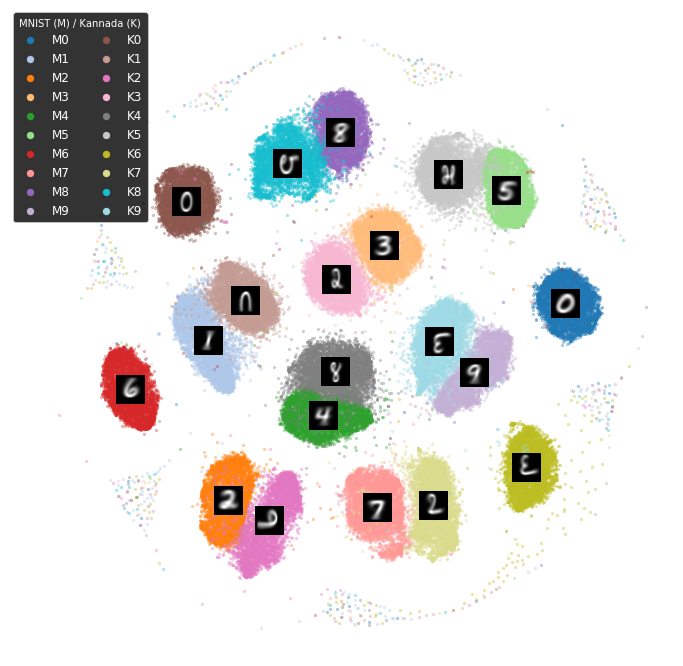

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = plt.cm.get_cmap('tab20')
for i in range(10):
    indexing = (mnist_y_train == i)
    vis_points = mnist_umap[indexing]
    ax.scatter(vis_points[:, 0], vis_points[:, 1], s=5, alpha=0.3, c=[cm.colors[i]], label='M{}'.format(i))
    
    mean_loc = np.mean(vis_points, axis=0)
    mean_class_img = np.squeeze(np.mean(mnist_x_train[indexing], axis=0))
    
    offset_img = OffsetImage(mean_class_img, zoom=1, cmap='gray')
    ab = AnnotationBbox(offset_img, mean_loc, xycoords='data', frameon=True, pad=0.0)
    ax.add_artist(ab)

for i in range(10):
    indexing = (kannada_y_train == i)
    vis_points = kannada_umap[indexing]
    ax.scatter(vis_points[:, 0], vis_points[:, 1], s=5, alpha=0.3, c=[cm.colors[10 + i]], label='K{}'.format(i))
    
    mean_class_img = np.squeeze(np.mean(kannada_x_train[indexing], axis=0))
    mean_loc = np.mean(vis_points, axis=0)
    
    offset_img = OffsetImage(mean_class_img, zoom=1, cmap='gray')
    ab = AnnotationBbox(offset_img, mean_loc, xycoords='data', frameon=True, pad=0.0)
    ax.add_artist(ab)

lgnd = ax.legend(loc="upper left", ncol=2, scatterpoints=1, fontsize=12, title="MNIST (M) / Kannada (K)")
for handle in lgnd.legendHandles:
    #handle.set_title('ABD')
    handle.set_sizes([40])
    handle.set_alpha(1)

ax.set_xlim(left=-47)
ax.axis('off')

In [9]:
plt.tight_layout()
fig.savefig(os.path.join(UMAP_PATH, "tsne_plot.png"), format='png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>